Пример решения задачи R - Кваритрография (Олимпиада по ИИ, тренировочный этап 2024)

# Загрузка данных

In [3]:
# импорт библиотек
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/всош_ИИ/2024_трен/R - Квартирография/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/всош_ИИ/2024_трен/R - Квартирография/test.csv')

In [5]:
df_train.head(3)

,region_name_cat,district_cat,corpus_cat,developer_cat,agreement_date,floor,square,rooms_4,location_logs_count_mean,location_depth,...,location_public_transport_platform_w_mean_distance,location_water_w_mean_distance,location_university_w_mean_distance,location_leisure_w_mean_distance,location_pop_shop_cnt,price_target,hc_name_cat,interior_cat,class_cat,stage_cat
0,Город,58,1331,91,2012-04-13,10.0,78.44,3,23.131066,13.0,...,0.894947,0.772872,1.309514,0.853183,7.0,25024.299281,36,0.0,97865,27728
1,Город,75,1677,91,2013-09-16,2.0,34.15,1,14.090185,13.0,...,1.063211,0.840130,-999.000000,1.147596,0.0,18477.300271,372,32413.0,97865,70661
2,Пригород,48,316,10,2014-07-31,17.0,59.85,2,19.453795,13.0,...,0.832622,-999.000000,-999.000000,0.905435,1.0,17441.013879,336,8977.0,97865,12638


In [6]:
df_test.head(3)

,region_name_cat,district_cat,corpus_cat,developer_cat,agreement_date,floor,square,rooms_4,location_logs_count_mean,location_depth,...,location_public_transport_stop_position_w_mean_distance,location_public_transport_platform_w_mean_distance,location_water_w_mean_distance,location_university_w_mean_distance,location_leisure_w_mean_distance,location_pop_shop_cnt,hc_name_cat,interior_cat,class_cat,stage_cat
0,Пригород,48,1894,91,2014-11-30,18.0,47.58,2,19.446927,13.0,...,0.535582,0.628607,-999.000000,-999.0,0.849043,1.0,368,32413.0,97865,27728
1,Город,41,1789,97,2014-09-26,16.0,55.47,2,22.280879,13.0,...,0.791124,0.946751,1.414248,-999.0,0.880100,10.0,202,49786.0,97865,27728
2,Пригород,48,1164,91,2014-11-12,3.0,39.35,2,19.469961,13.0,...,1.217568,1.077942,1.382267,-999.0,1.122493,1.0,154,32413.0,97865,27728


In [7]:
# размерность данных:
df_train.shape, df_test.shape

((93455, 83), (31492, 82))

Итог раздела "Загрузка данных":

Убедились, что данные загрузились верно, по столбцам разбиты нормально, индексы строк назначены корректно.

# Разведочный анализ

## Проверка и обработка пропусков

Выясняем наличие пропусков, их распределение по строкам и столбцам датасета, принимаем решение об их обработке. Важно, что датасет разбит на 2 части (обучающая и тестовая), поэтому анализировать необходимо обе.

In [8]:
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(183400, 189560)

Пропуски есть и в тренировочной, и что важнее в тестовой выборке! В тестовой выборке мы не можем удалять строки, по каждой из них необходимо выполнить предсказание данных. По этой причине мы можем либо удалять столбцы, либо заполнять пропуски новыми значениями.

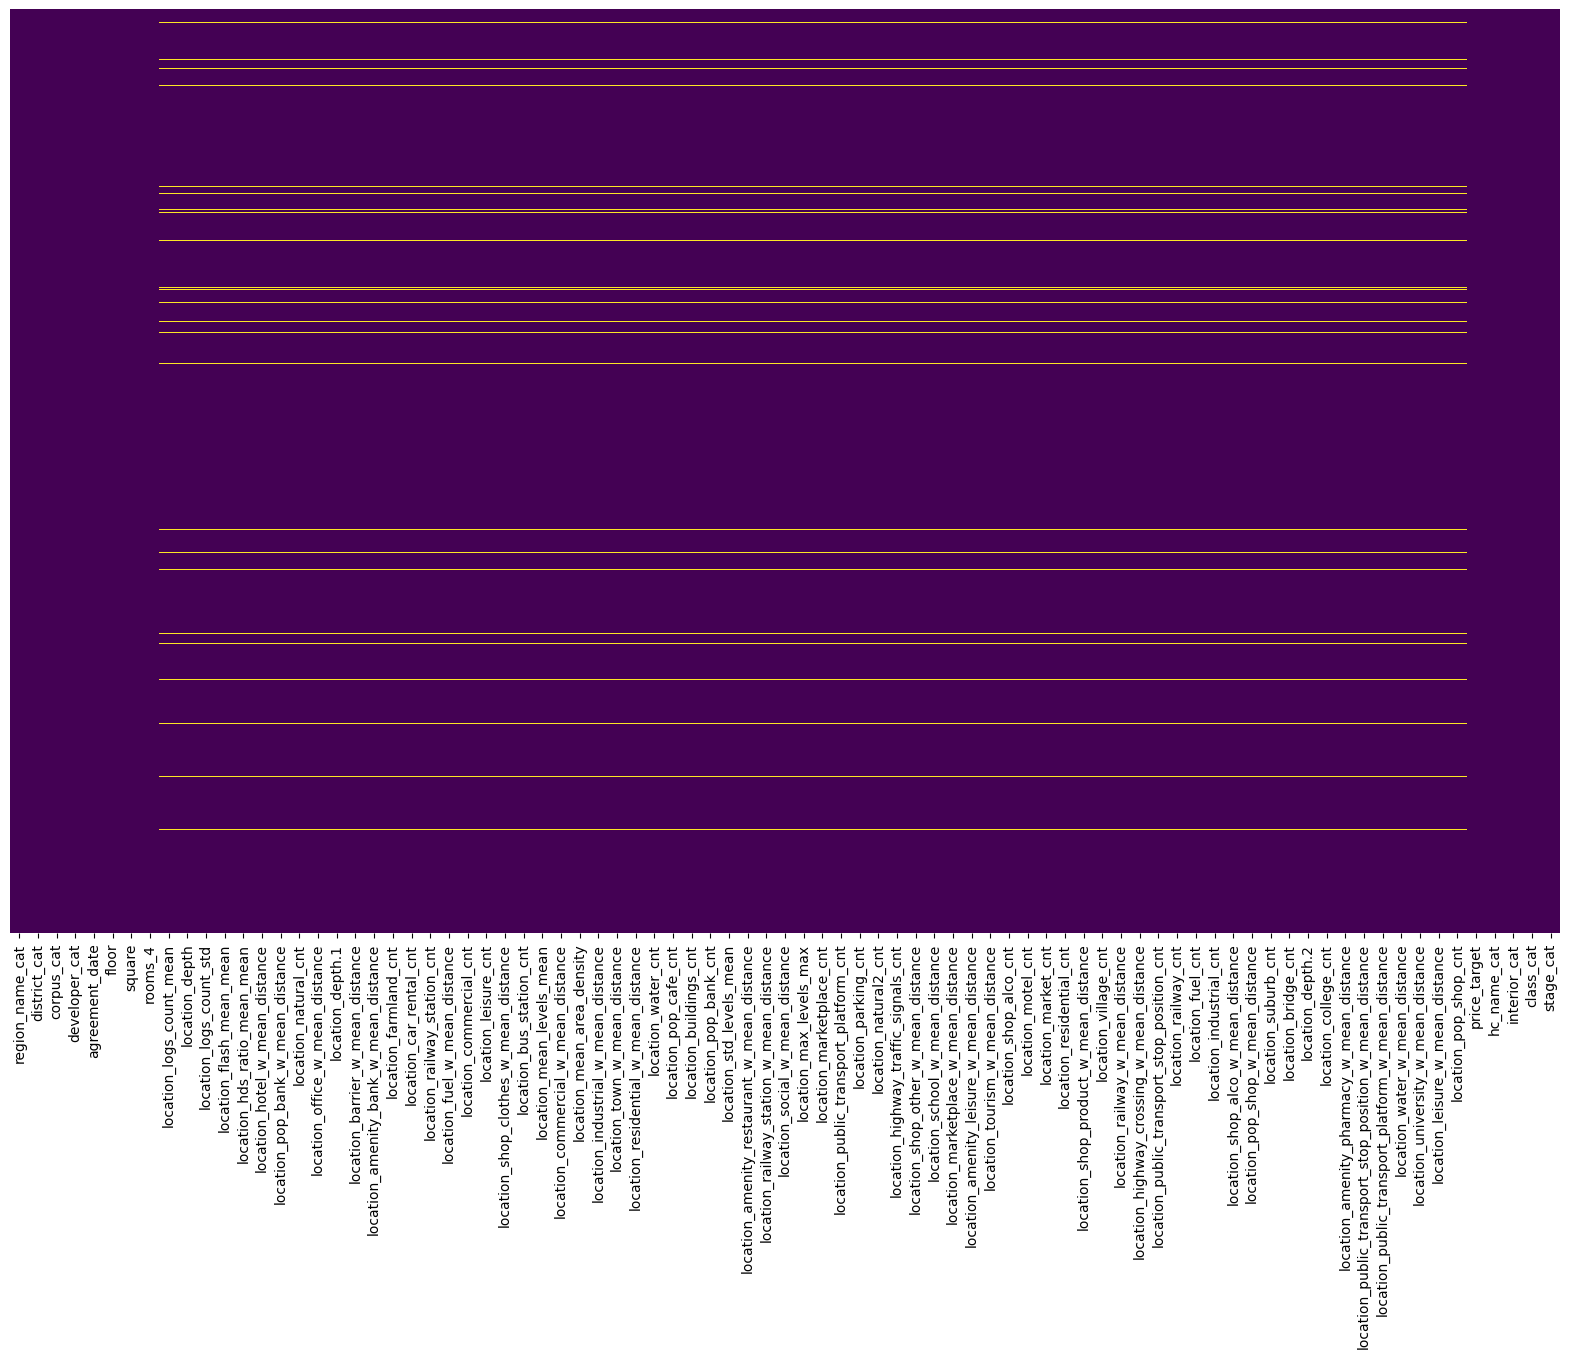

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

В тренировочной выборке видно, что повреждение данных происходит строко по строкам.

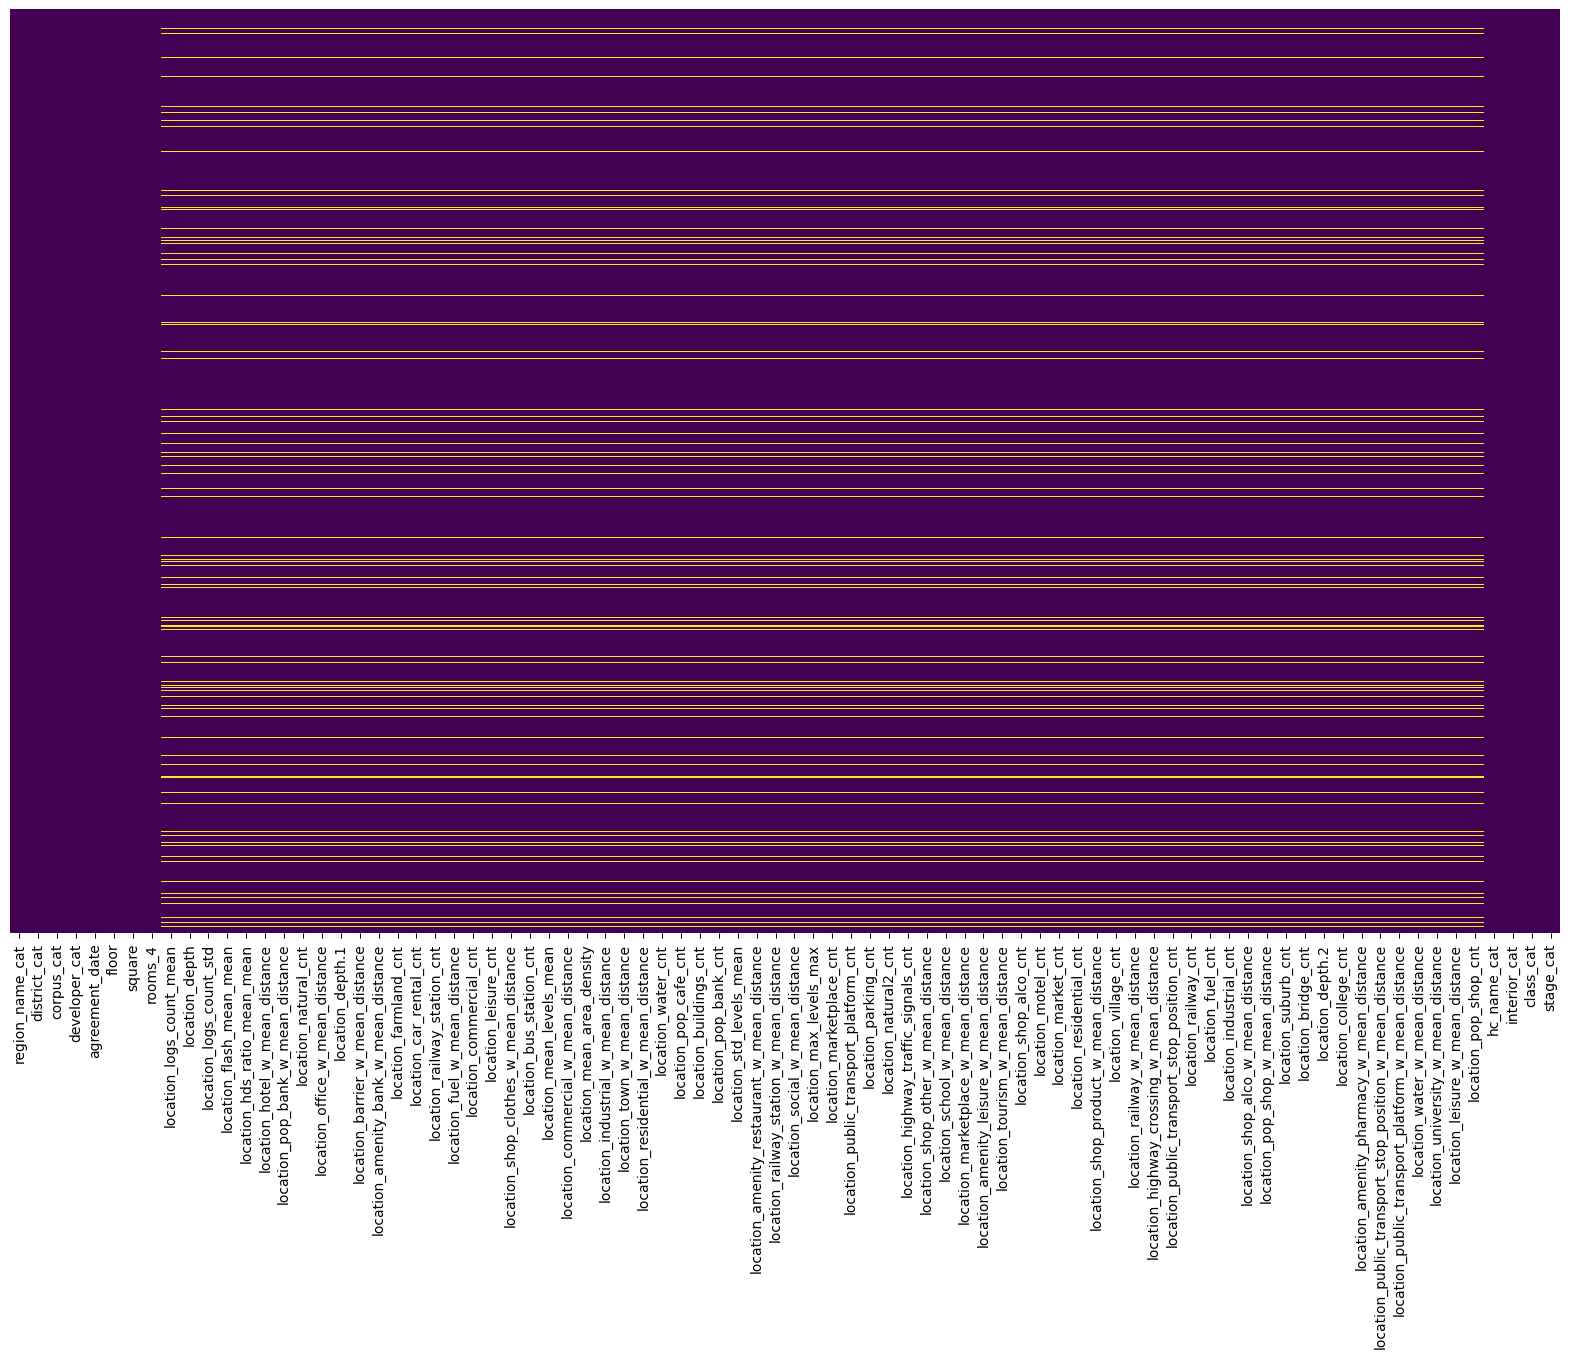

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

В тестовой выборке аналогичная ситуация.

Выхода два: а) удалить все столбцы с пропусками, б) заполнить пропуски данными по умолчанию.

Метод а) быстрее, при дефиците времени стоит начать с него и получить предсталение о качестве модели (может будет неплохим). Если итоговое качество окажется низким, можно будет вернуться и пойти по плану б).



In [11]:
df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)

In [12]:
df_train.head(3)

,region_name_cat,district_cat,corpus_cat,developer_cat,agreement_date,floor,square,rooms_4,price_target,hc_name_cat,interior_cat,class_cat,stage_cat
0,Город,58,1331,91,2012-04-13,10.0,78.44,3,25024.299281,36,0.0,97865,27728
1,Город,75,1677,91,2013-09-16,2.0,34.15,1,18477.300271,372,32413.0,97865,70661
2,Пригород,48,316,10,2014-07-31,17.0,59.85,2,17441.013879,336,8977.0,97865,12638


In [13]:
df_test.head(3)

,region_name_cat,district_cat,corpus_cat,developer_cat,agreement_date,floor,square,rooms_4,hc_name_cat,interior_cat,class_cat,stage_cat
0,Пригород,48,1894,91,2014-11-30,18.0,47.58,2,368,32413.0,97865,27728
1,Город,41,1789,97,2014-09-26,16.0,55.47,2,202,49786.0,97865,27728
2,Пригород,48,1164,91,2014-11-12,3.0,39.35,2,154,32413.0,97865,27728


In [14]:
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0)

Итог по подразделу "Обработка пропусков":

Выявленные пропуску удалены по столбцам.

## Категорирование данных

Данные, представленные нечисловыми элементами требуется обработать и сформировать из них новые признаки (столбцы) с числовыми данными.

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93455 entries, 0 to 93454
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_name_cat  93455 non-null  object 
 1   district_cat     93455 non-null  int64  
 2   corpus_cat       93455 non-null  int64  
 3   developer_cat    93455 non-null  int64  
 4   agreement_date   93455 non-null  object 
 5   floor            93455 non-null  float64
 6   square           93455 non-null  float64
 7   rooms_4          93455 non-null  object 
 8   price_target     93455 non-null  float64
 9   hc_name_cat      93455 non-null  int64  
 10  interior_cat     93455 non-null  float64
 11  class_cat        93455 non-null  int64  
 12  stage_cat        93455 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 9.3+ MB


### region_name_cat

Обрабока признака "region_name_cat". Согласно описанию это Регион расположения. Выясним количество уникальных значений.

In [16]:
df_train['region_name_cat'].unique(), df_test['region_name_cat'].unique()

(array(['Город', 'Пригород', 'Область'], dtype=object),
 array(['Пригород', 'Город', 'Область'], dtype=object))

Сформируем из них категориальные признаки по числу уникальных значений

In [17]:
ohe_1 = OneHotEncoder() # создание энкодера
ohe_1.fit(df_train[['region_name_cat']]) # обучение энкодера (запоминает уникальные значения и выставляет им индексы)
data_new = ohe_1.transform(df_train[['region_name_cat']]).toarray() # преобразуем данные обучающей выборки
data_new

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [18]:
df_train['region_cat_0'] = data_new[:,0]
df_train['region_cat_1'] = data_new[:,1]
df_train['region_cat_2'] = data_new[:,2]

In [19]:
df_train.head()

,region_name_cat,district_cat,corpus_cat,developer_cat,agreement_date,floor,square,rooms_4,price_target,hc_name_cat,interior_cat,class_cat,stage_cat,region_cat_0,region_cat_1,region_cat_2
0,Город,58,1331,91,2012-04-13,10.0,78.44,3,25024.299281,36,0.0,97865,27728,1.0,0.0,0.0
1,Город,75,1677,91,2013-09-16,2.0,34.15,1,18477.300271,372,32413.0,97865,70661,1.0,0.0,0.0
2,Пригород,48,316,10,2014-07-31,17.0,59.85,2,17441.013879,336,8977.0,97865,12638,0.0,0.0,1.0
3,Пригород,48,1409,91,2012-12-30,12.0,67.53,2,17019.139763,154,32413.0,97865,70661,0.0,0.0,1.0
4,Пригород,48,1590,91,2014-06-20,5.0,58.13,2,17132.394908,154,32413.0,97865,12638,0.0,0.0,1.0


In [20]:
# удаляем первый стобец (новые признаки добавлены, теперь он не нужен)
df_train = df_train.drop('region_name_cat',axis=1)

In [21]:
df_train.head(3)

,district_cat,corpus_cat,developer_cat,agreement_date,floor,square,rooms_4,price_target,hc_name_cat,interior_cat,class_cat,stage_cat,region_cat_0,region_cat_1,region_cat_2
0,58,1331,91,2012-04-13,10.0,78.44,3,25024.299281,36,0.0,97865,27728,1.0,0.0,0.0
1,75,1677,91,2013-09-16,2.0,34.15,1,18477.300271,372,32413.0,97865,70661,1.0,0.0,0.0
2,48,316,10,2014-07-31,17.0,59.85,2,17441.013879,336,8977.0,97865,12638,0.0,0.0,1.0


Аналогичные действия производим с тестовой выборкой

In [22]:
data_new = ohe_1.transform(df_test[['region_name_cat']]).toarray() # преобразуем данные тестовой выборки
df_test['region_cat_0'] = data_new[:,0] # добавление новых признаков
df_test['region_cat_1'] = data_new[:,1]
df_test['region_cat_2'] = data_new[:,2]
df_test = df_test.drop('region_name_cat',axis=1)
df_test.head(3)

,district_cat,corpus_cat,developer_cat,agreement_date,floor,square,rooms_4,hc_name_cat,interior_cat,class_cat,stage_cat,region_cat_0,region_cat_1,region_cat_2
0,48,1894,91,2014-11-30,18.0,47.58,2,368,32413.0,97865,27728,0.0,0.0,1.0
1,41,1789,97,2014-09-26,16.0,55.47,2,202,49786.0,97865,27728,1.0,0.0,0.0
2,48,1164,91,2014-11-12,3.0,39.35,2,154,32413.0,97865,27728,0.0,0.0,1.0


### agreement_date

Признак agreement_date необходимо преобразовать к типу данных DataTime

In [23]:
df_train['agreement_date'] = pd.to_datetime(df_train['agreement_date'], format='%Y-%m-%d')

In [24]:
df_test['agreement_date'] = pd.to_datetime(df_test['agreement_date'], format='%Y-%m-%d')

In [25]:
le = LabelEncoder()

print(df_train[['agreement_date']].values.shape, df_test[['agreement_date']].values.shape)
fit_data = pd.concat([df_test[['agreement_date']],df_train[['agreement_date']]],ignore_index=True)
print(fit_data.shape)

le = le.fit(fit_data)

df_train[['agreement_date']] = le.transform(df_train[['agreement_date']]).reshape(-1,1)
df_test[['agreement_date']] = le.transform(df_test[['agreement_date']]).reshape(-1,1)

#fit_data

(93455, 1) (31492, 1)
(124947, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### rooms_4

In [26]:
df_train.rooms_4.unique(), df_test.rooms_4.unique()

(array(['3', '1', '2', '>=4', 'студия'], dtype=object),
 array(['2', '1', '>=4', '3', 'студия'], dtype=object))

Произведём категорирование данных (OneHotEncoder). Код другой (для примера)

In [27]:
ohe_2 = OneHotEncoder(sparse_output = False) # создание энкодера
encoded_df = pd.DataFrame(ohe_2.fit_transform(df_train[['rooms_4']]))
ohe_2.get_feature_names_out()

array(['rooms_4_1', 'rooms_4_2', 'rooms_4_3', 'rooms_4_>=4',
       'rooms_4_студия'], dtype=object)

In [28]:
encoded_df.columns = ohe_2.get_feature_names_out()
encoded_df.head(3)

,rooms_4_1,rooms_4_2,rooms_4_3,rooms_4_>=4,rooms_4_студия
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0


In [29]:
# Присоединим новые признаки к исходному датафрейму
df_train = df_train.join(encoded_df)
# удалим исходный признак rooms_4
df_train.drop('rooms_4', axis = 1, inplace = True)

In [30]:
df_train.head(3)

,district_cat,corpus_cat,developer_cat,agreement_date,floor,square,price_target,hc_name_cat,interior_cat,class_cat,stage_cat,region_cat_0,region_cat_1,region_cat_2,rooms_4_1,rooms_4_2,rooms_4_3,rooms_4_>=4,rooms_4_студия
0,58,1331,91,99,10.0,78.44,25024.299281,36,0.0,97865,27728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,75,1677,91,617,2.0,34.15,18477.300271,372,32413.0,97865,70661,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,48,316,10,935,17.0,59.85,17441.013879,336,8977.0,97865,12638,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [31]:
# аналогичные действия с тем же энкодером произведём для тестовой выборки
encoded_df = pd.DataFrame(ohe_2.transform(df_test[['rooms_4']])) # (!) только transform
encoded_df.columns = ohe_2.get_feature_names_out()
df_test = df_test.join(encoded_df)
df_test.drop('rooms_4', axis = 1, inplace = True)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93455 entries, 0 to 93454
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district_cat    93455 non-null  int64  
 1   corpus_cat      93455 non-null  int64  
 2   developer_cat   93455 non-null  int64  
 3   agreement_date  93455 non-null  int64  
 4   floor           93455 non-null  float64
 5   square          93455 non-null  float64
 6   price_target    93455 non-null  float64
 7   hc_name_cat     93455 non-null  int64  
 8   interior_cat    93455 non-null  float64
 9   class_cat       93455 non-null  int64  
 10  stage_cat       93455 non-null  int64  
 11  region_cat_0    93455 non-null  float64
 12  region_cat_1    93455 non-null  float64
 13  region_cat_2    93455 non-null  float64
 14  rooms_4_1       93455 non-null  float64
 15  rooms_4_2       93455 non-null  float64
 16  rooms_4_3       93455 non-null  float64
 17  rooms_4_>=4     93455 non-null 

Итог подраздела: категорировали данные двух текстовых признаков, и одного DateTime

## Анализ данных

Выявим признаки, которые наилучшим образом влияют на целевой признак (price_target)

In [33]:
df_train.corr(method='pearson')[['price_target']].style.background_gradient(cmap='PiYG')

,price_target
district_cat,0.035531
corpus_cat,-0.002626
developer_cat,-0.085426
agreement_date,-0.018556
floor,0.045673
square,0.448541
price_target,1.000000
hc_name_cat,-0.155880
interior_cat,0.069718
class_cat,-0.680407


In [34]:
df_train.corr(method='kendall')[['price_target']].style.background_gradient(cmap='PiYG')

,price_target
district_cat,0.012001
corpus_cat,0.021129
developer_cat,0.047727
agreement_date,-0.011558
floor,0.059204
square,0.204888
price_target,1.000000
hc_name_cat,-0.110016
interior_cat,0.099702
class_cat,-0.526002


In [35]:
df_train.corr(method='spearman')[['price_target']].style.background_gradient(cmap='PiYG')

,price_target
district_cat,0.028926
corpus_cat,0.030206
developer_cat,0.062140
agreement_date,-0.018151
floor,0.086852
square,0.303733
price_target,1.000000
hc_name_cat,-0.154781
interior_cat,0.132751
class_cat,-0.638782


По итогам исследования всех методов корреляции выявлено, что следующие признаки не имеют выраженной зависимости (во всех трёх случаях наблюдается низкая зависимость):

*   district_cat
*   corpus_cat
*   agreement_date

Их можно удалить или сконструировать из них новый.

(пока оставим как есть)




# Подготовка данных к обучению модели

## Нормализация данных

In [36]:
Y_train = df_train[['price_target']]
X_train = df_train.drop('price_target',axis=1)
X_test = df_test

In [37]:
transformer_x = StandardScaler().fit(X_train)
X_train = transformer_x.transform(X_train)
X_test = transformer_x.transform(X_test)

In [38]:
transformer_y = StandardScaler().fit(Y_train)
Y_train = transformer_y.transform(Y_train)

## Разделение первой части на тренировочную и валидационную выборки

In [40]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

# Подбор модели

In [41]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor

from sklearn.metrics import mean_absolute_percentage_error

In [42]:
models = [LinearRegression(),RidgeCV(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),XGBRegressor(),XGBRFRegressor()]

In [ ]:
models = [LinearRegression(),RidgeCV(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),XGBRegressor(),XGBRFRegressor()]
errors = []
for model in models:
  model.fit(X_train,Y_train)
  predictions = model.predict(X_val)
  err = mean_absolute_percentage_error(Y_val, predictions)
  errors.append(err)
  print(model,err)

In [55]:
models_names = ['LinearRegression','RidgeCV','DecisionTreeRegressor','SVR','KNeighborsRegressor','XGBRegressor','XGBRFRegressor']
pd.DataFrame(errors,index=models_names).sort_values(0)

,0
KNeighborsRegressor,1.114979
DecisionTreeRegressor,1.385430
XGBRegressor,1.762561
SVR,2.789246
XGBRFRegressor,5.998276
RidgeCV,12.649177
LinearRegression,12.650831


Лучший перспективный результат показала модель KNeighborsRegressor, продолжим работу с настройкой параметров

# Улучшение модели. Подбор параметров

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # методы поиска гиперпараметров

In [82]:
knr = KNeighborsRegressor()

param_grid = {'n_neighbors': [3], # [3,5,7],
              'weights': ['distance'], # ['uniform','distance'],
              #'algorithm': ['ball_tree','kd_tree','brute','auto'],
              'leaf_size': [i for i in range(10,51,10)]
              }

# ~3 min на модель
n = 1
for key in param_grid: n *= len(param_grid[key])
print(f'Рассчетное время работы: {3*n} мин')

grid_search = GridSearchCV(knr, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train,Y_train)

Рассчетное время работы: 15 мин


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50], 'n_neighbors': [3],
                         'weights': ['distance']},
             scoring='neg_mean_absolute_percentage_error')

In [83]:
grid_search.best_estimator_

KNeighborsRegressor(leaf_size=10, n_neighbors=3, weights='distance')

In [84]:
grid_search.best_score_

-1.0197018992695919

In [85]:
grid_search.best_params_

{'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}

# Обучение модели

In [117]:
knr = KNeighborsRegressor(n_neighbors=3, weights='distance', leaf_size=10)
knr.fit(X_train,Y_train)
predictions = knr.predict(X_val)
err = mean_absolute_percentage_error(Y_val, predictions)
err

0.7620205511721982

In [118]:
# дообучение модели на валидационных данных
knr.fit(X_val,Y_val)

KNeighborsRegressor(leaf_size=10, n_neighbors=3, weights='distance')

# Получение и сохраненение результатов

In [120]:
Y_result = knr.predict(X_test)

In [121]:
Y_result

array([[-0.62920365],
       [ 0.25914878],
       [-0.77699903],
       ...,
       [-0.67395494],
       [-0.66487298],
       [-0.58521968]])

In [122]:
Y_test = transformer_y.inverse_transform(Y_result)
Y_test

array([[18139.25371617],
       [26901.58620361],
       [16681.46263342],
       ...,
       [17697.84591855],
       [17787.42649279],
       [18573.09296751]])

In [123]:
df_res = pd.DataFrame(Y_test,columns=['target_price'])
df_res.head(), df_res.shape

(   target_price
 0  18139.253716
 1  26901.586204
 2  16681.462633
 3  24796.724412
 4  17409.050687,
 (31492, 1))

In [124]:
df_res.to_csv()

',target_price\n0,18139.253716166306\n1,26901.586203614155\n2,16681.46263342067\n3,24796.72441190159\n4,17409.050687247924\n5,27469.988815731303\n6,41592.27419006502\n7,24029.647987318873\n8,23151.923998890517\n9,27481.152049146385\n10,31924.088941444235\n11,16623.12789983851\n12,21689.975083214664\n13,18438.27307354287\n14,26833.95547735049\n15,17581.51706213219\n16,29701.42261695258\n17,32800.41728147738\n18,25674.188635974406\n19,17484.370676204242\n20,26060.00794774767\n21,21077.581058200183\n22,24608.184945650093\n23,26112.537802789942\n24,17533.25663054201\n25,17138.48291110344\n26,25149.132324578877\n27,17523.40855468206\n28,20870.41744848196\n29,19921.89116064908\n30,27072.34116487494\n31,25974.914500365943\n32,20405.109296674655\n33,20410.582085493388\n34,39673.51564555823\n35,16482.94283588061\n36,18019.947486084086\n37,21858.525176580624\n38,29755.234882035915\n39,16338.705717085659\n40,19167.44288535272\n41,23647.226360420813\n42,17821.968031904747\n43,17090.67193697597\n44

In [125]:
df_res.to_csv(index=False)

'target_price\n18139.253716166306\n26901.586203614155\n16681.46263342067\n24796.72441190159\n17409.050687247924\n27469.988815731303\n41592.27419006502\n24029.647987318873\n23151.923998890517\n27481.152049146385\n31924.088941444235\n16623.12789983851\n21689.975083214664\n18438.27307354287\n26833.95547735049\n17581.51706213219\n29701.42261695258\n32800.41728147738\n25674.188635974406\n17484.370676204242\n26060.00794774767\n21077.581058200183\n24608.184945650093\n26112.537802789942\n17533.25663054201\n17138.48291110344\n25149.132324578877\n17523.40855468206\n20870.41744848196\n19921.89116064908\n27072.34116487494\n25974.914500365943\n20405.109296674655\n20410.582085493388\n39673.51564555823\n16482.94283588061\n18019.947486084086\n21858.525176580624\n29755.234882035915\n16338.705717085659\n19167.44288535272\n23647.226360420813\n17821.968031904747\n17090.67193697597\n27979.291021053476\n34326.50154595666\n17260.590114928124\n35710.550276869064\n23113.921409776463\n21036.10580615435\n29638.4

In [126]:
df_res.to_csv('submission.csv',index=False)
#df_res.to_csv('/content/drive/MyDrive/Colab Notebooks/всош_ИИ/2024_трен/R - Квартирография/submission.csv',index=False)